In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle
from sklearn.decomposition import PCA

%matplotlib inline

In [18]:
### Read in inputs dataframe as well as weights and target series from job 03_var_reduction.ipynb
new_X_train = pickle.load(open("new_train_inputs.p",'rb'))
new_X_test = pickle.load(open("new_test_inputs.p",'rb'))
y_train = pickle.load(open("y_train.p",'rb'))
y_test = pickle.load(open("y_test.p",'rb'))
wt_train_ = pickle.load(open("wt_train_.p",'rb'))
wt_test_ = pickle.load(open("wt_test_.p",'rb'))

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 900, max_depth=2)
rfc.fit(new_X_train, y_train,sample_weight=wt_train_)
y_pred = rfc.predict(new_X_train)
print('train:', metrics.accuracy_score(y_train, y_pred))
y_pred = rfc.predict(new_X_test)
print('test:', metrics.accuracy_score(y_test, y_pred))

train: 0.217501585289
test: 0.199112238427


Training Data Accuracy: 0.21
Test Data Accuracy:     0.19


Precision:              nan
Recall:                 nan

Confusion Matrix:

[[  0   0   0  14  22   0  18   0   0   4   0  53]
 [  0   0   0  12  41   0  20   0   0   4   0  41]
 [  0   0   0  16  46   0  19   0   0   1   0  30]
 [  0   0   0  56  41   0  12   0   0   3   0  50]
 [  0   0   0   7 138   0  10   0   0   3   0   9]
 [  0   0   0  19  49   0  22   0   0   7   0  59]
 [  0   0   0  27  57   0  19   0   0   8   0  48]
 [  0   0   0   6  48   0  15   0   0   6   0  29]
 [  0   0   0  10  18   0   6   0   0   6   0  20]
 [  0   0   0  12  46   0  21   0   0  23   0  33]
 [  0   0   0  32  31   0  20   0   0  16   0  47]
 [  0   0   0  41  32   0  12   0   0   9   0  65]]


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars


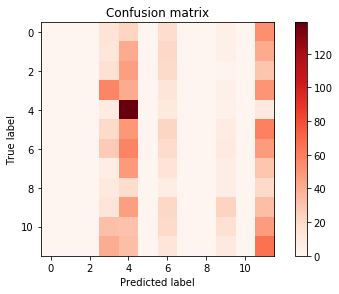

In [33]:
from sklearn.metrics import confusion_matrix
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# accuracy for test & train:
train_acc=rfc.score(new_X_train, y_train,sample_weight=wt_train_)
test_acc=rfc.score(new_X_test,y_test,sample_weight=wt_test_)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = y_test
y_pred = rfc.predict(new_X_test)
conf = confusion_matrix(y_true, y_pred, sample_weight=wt_test_)
print ('\n')
print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
print ('\nConfusion Matrix:\n')
print(conf.astype(int))

cm=confusion_matrix(y_true, y_pred, labels=None, sample_weight=wt_test_)

plt.figure()
plot_confusion_matrix(cm)